# Task 2: Energy Balance Models, version 2 (EBM2)

Georgina Gomes GMSGEO001

Use a programming language of your choice (Fortran, MATLAB, R or Python) to develop Version 2 of the Energy Balance Model (EBM2) by solving the following equation. 

$C_p \frac{\partial T}{\partial t} = S(1-\alpha) - 4\epsilon \sigma T^4$

where symbols have their standard meanings and values, as discussed in class.

- Plot the solution for four selected initial temperatures (at least one below 0°C), with the time axis labelled in years. Compare the solution at the end of the time period to the corresponding equilibrium temperature from the Task 1 model.
- How do changes in Cp affect the equilibrium time of the model? Do they influence the equilibrium temperature, both in terms of time and value?
- Add an ice-albedo feedback condition to your model, where α = 0.62 if T < 0°C. Compare the equilibrium values obtained now with those in (a). 
- How might this help us understand climate change and tipping points?
- Discuss the limitations of using this model for climate change study.


## Part 1: Plot the solution for four selected initial temperatures (at least one below 0°C), with the time axis labelled in years. Compare the solution at the end of the time period to the corresponding equilibrium temperature from the Task 1 model.

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

### Numerical solution:

$\frac{dT}{dt} = \frac{1}{C_p}(S(1-\alpha) - 4\epsilon \sigma T^4)$

To get approximate future time steps we can do:


=> $\frac{\Delta T}{\Delta t} \approx \frac{1}{C_p}(S(1-\alpha) - 4\epsilon \sigma {T_{i}}^{4})$


=> $(T_{i+1} - T_i) \approx \frac{\Delta t}{C_p}(S(1-\alpha) - 4\epsilon \sigma {T_{i}}^{4})$

We solve for $T_{i+1}$

In [149]:
def ebm2(S, alpha, epsilon, sigma, C_p, dt, N, T_0_celsius):
    #initialise T (temperature array) and N (timestep array)
    T = np.zeros(N)
    time = np.arange(0, N*dt, dt)
    T_0 = T_0_celsius + 273.15
    T[0] = T_0
    for i in range(N - 1):
        T[i+1] = ((dt/C_p)*(S*(1-alpha)-4*epsilon*sigma*((T[i])**4))) + T[i]
    T_celsius = T - 273.15
    display(Math(rf"T_n = {T_celsius[-1]:.2f}\ ^\circ C"))
    time_years = time / (3600 * 24 * 365.25)
    return T_celsius, time_years

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

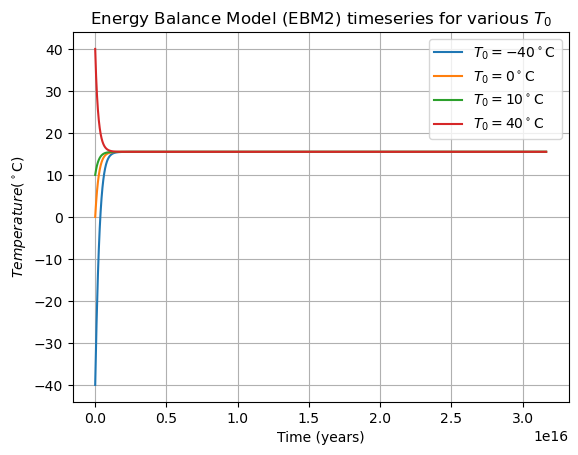

In [150]:
#present case parameters
S = 1372
alpha = 0.3
sigma = 0.0000000567
emissivity = 0.61
C_p = 1.05e23
dt = 1.0e21
Nstep = 1000


initial_temperatures = [-40, 0, 10, 40]
for T_0 in initial_temperatures:
    T, time = ebm2(S, alpha, emissivity, sigma, C_p, dt, Nstep, T_0)
    plt.plot(time, T, label=rf"$T_0 = {T_0}^\circ\mathrm{{C}}$")
    
plt.xlabel("Time (years)")
plt.ylabel(r"$Temperature (^\circ\text{C})$")
plt.title(r"Energy Balance Model (EBM2) timeseries for various $T_0$")
plt.grid()
plt.legend()
plt.show()

#### The initial temperaure does not influence the equilibrium temperature from what we see in this graph. Regardless of initial temperature, the system reaches an equilibrium state. It does appear however, that for temperatures close to the equilibrium temperature of $\approx 15.5^\circ\text{C}$, the time the system takes to reach equilibrium is faster. The equilibrium temperature is the same temperature we saw in Task 1 EBM1.

## How do changes in $C_p$ affect the equilibrium time of the model? Do they influence the equilibrium temperature, both in terms of time and value?

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

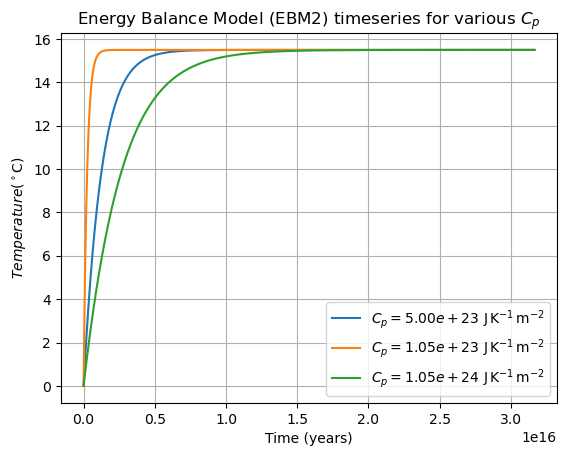

In [151]:
#present case parameters
S = 1372
alpha = 0.3
sigma = 0.0000000567
emissivity = 0.61
dt = 1.0e21
Nstep = 1000
T_0 = 0

Cp_values = [5e23, 1.05e23, 1.05e24]
for C_p in Cp_values:
    T, time = ebm2(S, alpha, emissivity, sigma, C_p, dt, Nstep, T_0)
    plt.plot(time, T, label = rf"$C_p = {C_p:.2e}\ \mathrm{{J\,K^{{-1}}\,m^{{-2}}}}$")

plt.xlabel("Time (years)")
plt.ylabel(r"$Temperature (^\circ\text{C})$")
plt.title(r"Energy Balance Model (EBM2) timeseries for various $C_p$")
plt.grid()
plt.legend()
plt.show()   


Changing the heat capacity changes the time that equilibrium is reached, for larger heat capacity, the equilibrium time is slower and for smaller heat capacity, the equilibrium time is faster. This shows that when the heat capacity is small, the system is very quick to respond whereas large heat capacity makes the system slow to respond. The equilibrium temperature however remains the same at $\approx 15.5^\circ\text{C}$.

## Part 3: Add an ice-albedo feedback condition to your model, where α = 0.62 if T < 0°C. Compare the equilibrium values obtained now with those in (a).

In [152]:
def ebm2_ice_feedback(S, alpha, epsilon, sigma, C_p, dt, N, T_0_celsius):
    #initialise T (temperature array) and N (timestep array)
    T = np.zeros(N)
    time = np.arange(0, N*dt, dt)
    T_0 = T_0_celsius + 273.15
    T[0] = T_0
    
    for i in range(N - 1):
        if T[i] < 273.15:
            alpha = 0.62
        else:
            alpha = 0.3

        T[i+1] = ((dt/C_p)*(S*(1-alpha)-4*epsilon*sigma*((T[i])**4))) + T[i]
    T_celsius = T - 273.15
    display(Math(rf"T_n = {T_celsius[-1]:.2f}\ ^\circ C"))
    time_years = time / (3600 * 24 * 365.25)
    
    return T_celsius, time_years

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

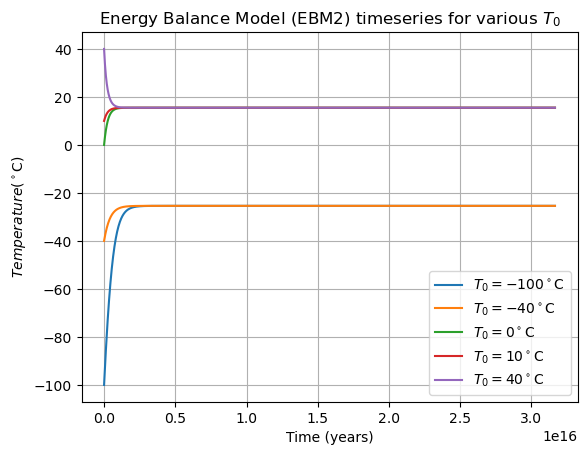

In [153]:
#present case parameters
S = 1372
alpha = 0.3
sigma = 0.0000000567
emissivity = 0.61
C_p = 1.05e23
dt = 1.0e21
Nstep = 1000


initial_temperatures = [-100, -40, 0, 10, 40]
for T_0 in initial_temperatures:
    T, time = ebm2_ice_feedback(S, alpha, emissivity, sigma, C_p, dt, Nstep, T_0)
    plt.plot(time, T, label=rf"$T_0 = {T_0}^\circ\mathrm{{C}}$")
    
plt.xlabel("Time (years)")
plt.ylabel(r"$Temperature (^\circ\text{C})$")
plt.title(r"Energy Balance Model (EBM2) timeseries for various $T_0$")
plt.grid()
plt.legend()
plt.show()

After adding the ice feedback, the equilibrium temperature for negative $T_0$, is $-25.38^\circ\text{C}$, for positive $T_0$ the equilibrium temperature is the same.

## Part 4: How might this help us understand climate change and tipping points?

Adding the ice feedback shows illustrates a tipping point where if the initial temperature is negative, i.e. we are dealing with ice, then a new, very low, equilibrium temperature is reached. This is useful for creating scenarios to help test future outcomes if certain thresholds are reached.

## Part 5: Discuss the limitations of using this model for climate change study.

This model is an improvement on EBM1 since we now have time involved but there is still no spatial variable here so the model still assumes global constant temperature and has the same parameters.